<a href="https://colab.research.google.com/github/arpittiwari11/Image-Processing-for-Mold-Damage-Detection/blob/main/OpenCv%20Methods/Feature%20Matching/Feature_Matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import imutils
from skimage.metrics import structural_similarity as ssim
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

imageB = cv2.imread("/content/drive/MyDrive/casting_data/train/def_front/cast_def_0_0.jpeg")
imageA = cv2.imread("/content/drive/MyDrive/casting_data/train/ok_front/cast_ok_0_1001.jpeg")

# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [6]:

(score, diff) = ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")

In [7]:
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)


In [9]:
from google.colab.patches import cv2_imshow

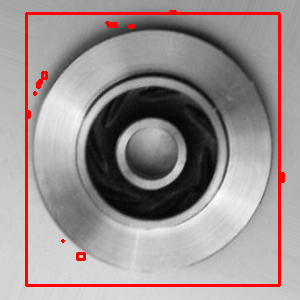

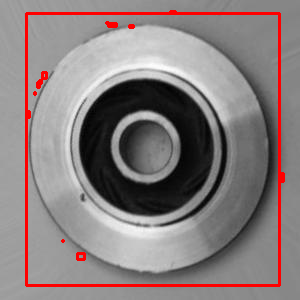

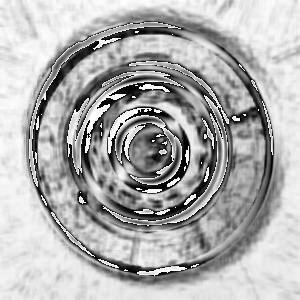

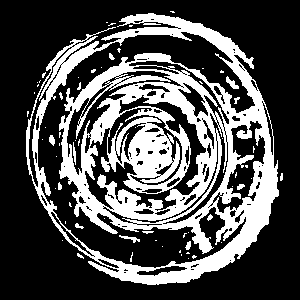

In [13]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
cv2_imshow(imageA)
cv2_imshow(imageB)
cv2_imshow(diff)
cv2_imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()